In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
order_id          5000 non-null int64
shop_id           5000 non-null int64
user_id           5000 non-null int64
order_amount      5000 non-null int64
total_items       5000 non-null int64
payment_method    5000 non-null object
created_at        5000 non-null object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


In [5]:
df['shop_id'].nunique()

100

In [6]:
df['created_at']=pd.to_datetime(df.created_at)

In [7]:
df.sort_values(by=['created_at'], inplace=True)

## AOV is $3145

In [37]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

## Cumulative Distribution reveals that there are outliers! which is why the value of mean is "skewed"

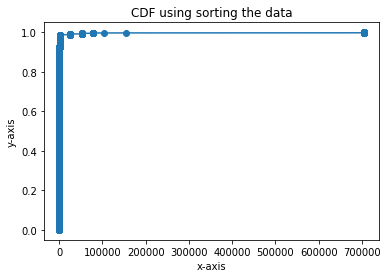

In [40]:
N = len(df['order_amount'])
  
# sort the data in ascending order
x = np.sort(df['order_amount'])
  
# get the cdf values of y
y = np.arange(N) / float(N)
  
# plotting
plt.xlabel('x-axis')
plt.ylabel('y-axis')
  
plt.title('CDF using sorting the data')
  
plt.plot(x, y, marker='o')

## Box plot is  also revealing that there are some outliers!

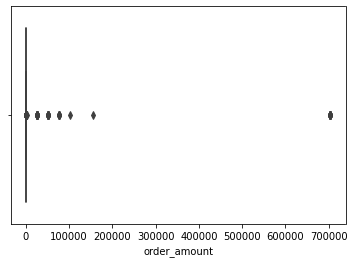

In [42]:
ax = sns.boxplot(x="order_amount", data=df)

In [43]:
df['order_amount'].median()

284.0

### Q-1.1 Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

#### - Calculations are skewed because of outliers
#### - Better way: Using median values as these are not affected by outliers

### Q-1.2 What metric would you report for this dataset?
##### - Median would be a better metric

### Q-1.3 What is its value?
#### -  $284